# Tarea 13 Adán Rubiol

In [68]:
function euler(f,list,x0)#se cre la función que toma como entradas, la función vectorial, lista de tiempo y la condición
    #inicial x(0)
     x = x0#se inicia la variable x en x(0)
     h = list[2]-list[1] #calculamos el tamaño del paso
     listx=[]#se crea la lista  para posteriormente guardar los datos
     push!(listx,x)#se  gurada la los valores de x en listx
     for i in 2:length(list)#en este for se realiza el método de euler para todos los elementos de la listax
        t = i*h#asigna los valores de tiempo
        x = x + f(x,t)*h#calculamos x de acuerdo al método de euler
        push!(listx,x) #se  gurada la los valores de x en listx
     end
     return listx#se regresa la lista x
end

euler (generic function with 1 method)

In [69]:
function RK4vec(f,list,x0)#se cre la función que toma como entradas, la función vectorial, lista de tiempo y la condición
    #inicial x(0)
     x = x0#se inicia la variable x en x(0)
     h = list[2]-list[1]#calculamos el tamaño del paso
     listx=[]#se crea la lista  para posteriormente guardar los datos
     push!(listx,x)#se  gurada la los valores de x en listx
    for i in 2:length(list)#en este for se realiza el método de euler para todos los elementos de la listax
    t = i*h#asigna los valores de tiempo
    k1=f(x,t)#se definen todos los coeficientes del método de Runge Kutta de O(4)
    k2=f(x+((h/2)*k1),t+h/2)
    k3=f(x+((h/2)*k2),t+h/2)
    k4=f(x+h*k3,t+h)
    x=x+ (h/6)*(k1+2*k2+2*k3+k4)
    push!(listx,x) #se  gurada la los valores de x en listx
     end
     return listx#se regresa la lista x
end

RK4vec (generic function with 1 method)

Ejercicio 1.

In [70]:
f(x,t) = [x[2],-x[1]-x[2]]#se crea la función del oscilador armónico amortiguado

f (generic function with 1 method)

In [71]:
list=0:0.1:200; #se cre la lista de t
vec=euler(f,list,[1,0]); #definimos un vector donde usando método de euler con  x(0)=1, x'(0)=1
vec1=RK4vec(f,list,[1,0]); #definimos un vector donde usando método de Runge Kutta con  x(0)=1, x'(0)=1

In [72]:
listx1=map(x->x[1],vec);#se crea una lista donde se evalua  v en el método de euler 
listx2=map(x->x[2],vec);#se crea una lista donde se evalua  x en el método de euler 
listx3=map(x->x[1],vec1);#se crea una lista donde se evalua  x en el método de Runge Kutta 
listx4=map(x->x[2],vec1);#se crea una lista donde se evalua  v en el método de Runge Kutta 

In [73]:
using PyPlot

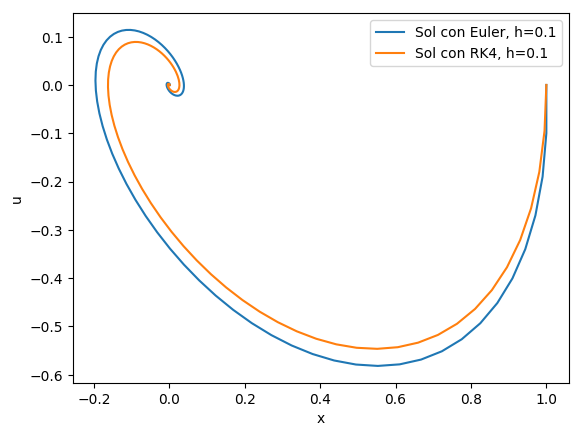

In [74]:
xlabel("x");ylabel("u")

plot(listx1,listx2,label="Sol con Euler, h=0.1");#se grafica x vs v para método de euler
plot(listx3,listx4,label="Sol con RK4, h=0.1");#se grafica x vs v para Runge Kutta
legend()

Ejercicio 2

In [75]:
F(x,t) = [x[2],-sin(x[1])]#definimos la función vectorial para el oscilador armónico

F (generic function with 1 method)

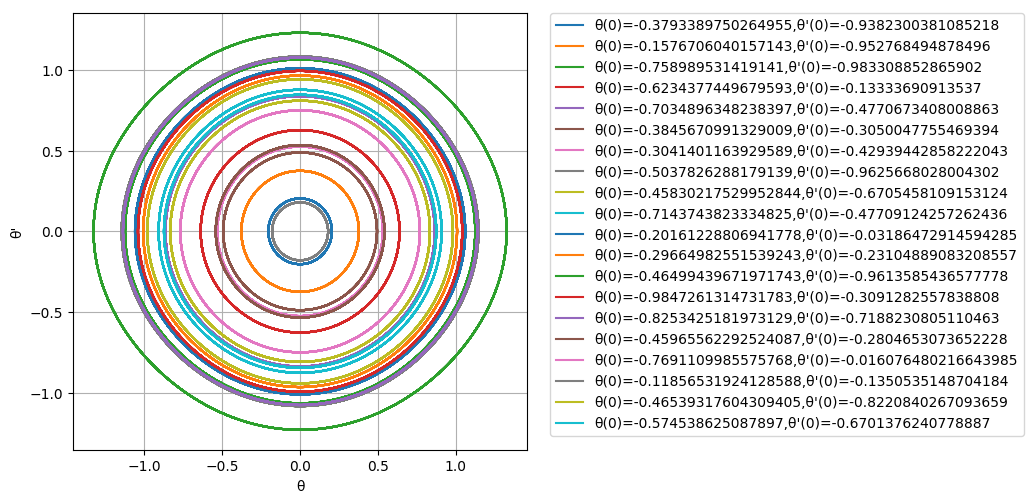

In [76]:
x=rand()-1#se genera una condición inicial x0
# aleatoria
u=rand()-1#se genera una condición inicial u0
# aleatoria
lis=0:0.001:100#definimos otra lista de t 
for i in 1:20# en este for se grafica x y u para 20 condiciones iniciales
x=rand()-1
u=rand()-1
ax=axes()
vec1=RK4vec(F,lis,[x,u]);   
listx3=map(x->x[1],vec1);
listx4=map(x->x[2],vec1);
grid("on")
xlabel("θ");ylabel("θ'"),
plot(listx3,listx4,label="θ(0)=$x,θ'(0)=$u");
legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
ax[:set_position]([0.06,0.06,0.71,0.91])
end


Ejercicio 3

In [77]:
g(x,t)= x[1]^2-1

g (generic function with 1 method)

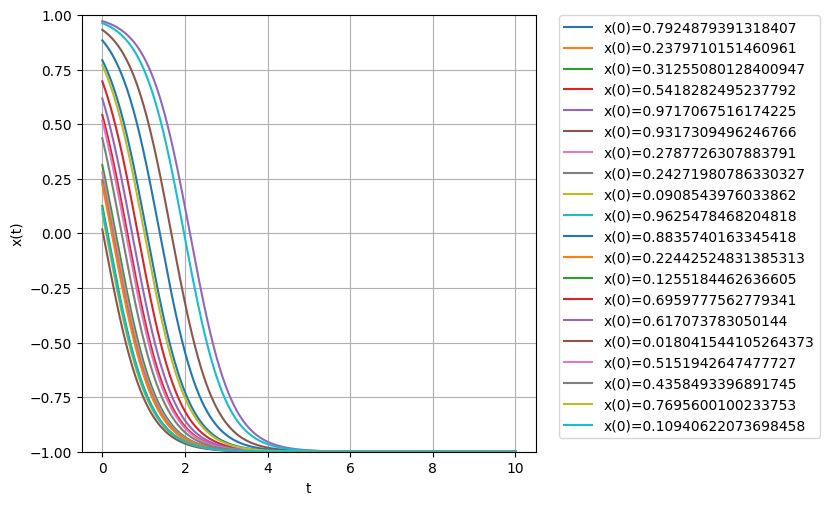

In [78]:
x=rand()#se genera una condición inicial x0
# aleatoria
lis=0:0.001:10#inimos otra lista de t 
for i in 1:20#en este for se grafica x y u para 20 condiciones iniciales
x=rand()
ax=axes()
vec1=RK4vec(g,lis,x);   
listx3=map(x->x[1],vec1);
grid("on")
xlabel("t");ylabel("x(t)"),
plot(lis,listx3,label="x(0)=$x");
ylim(-1,1);
legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
ax[:set_position]([0.06,0.06,0.71,0.91])
end
#se observa que 1 es um repulsor y -1 un atractor

Ejercicio 4

In [79]:
h(x,t)=x[1]^2#se define la nueva función

h (generic function with 1 method)

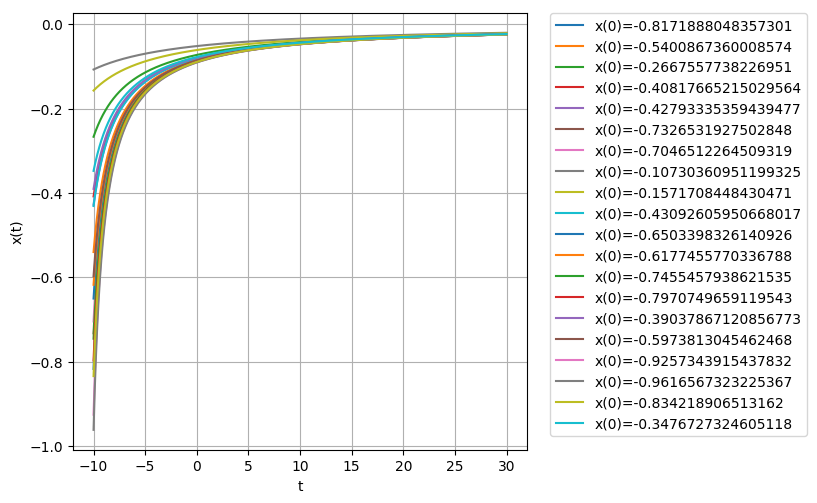

In [80]:
x=rand()-1#se genera una condición inicial x0
# aleatoria
lis=-10:0.001:30#definimos otra lista de t 
for i in 1:20#en este for se grafica x y u para 20 condiciones iniciales
x=rand()-1
ax=axes()
vec1=RK4vec(h,lis,x);   
listx4=map(x->x[1],vec1);
grid("on")
xlabel("t");ylabel("x(t)"),
plot(lis,listx4,label="x(0)=$x");
legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
ax[:set_position]([0.06,0.06,0.71,0.91])
end
#en este caso se observa que el cero es un atractor

In [94]:
f1(x,t) = [x[1],x[2]]
f2(x,t) = [-x[1],-x[2]]
f3(x,t) = [x[1],-2x[2]]
f4(x,t) = [x[1]-0.5x[2],0]
f5(x,t) = [x[2],-x[1]]
f6(x,t) = [x[1]+x[2],-x[1]+x[2]]
f7(x,t) = [-x[1]+x[2],-x[1]-x[2]]
f8(x,t) = [-x[1]-x[2],x[1]-x[2]]
f9(x,t) = [x[1]+4x[2],-2x[1]+x[2]]
f10(x,t) = [-x[1]-x[2],-x[2]]

f10 (generic function with 1 method)

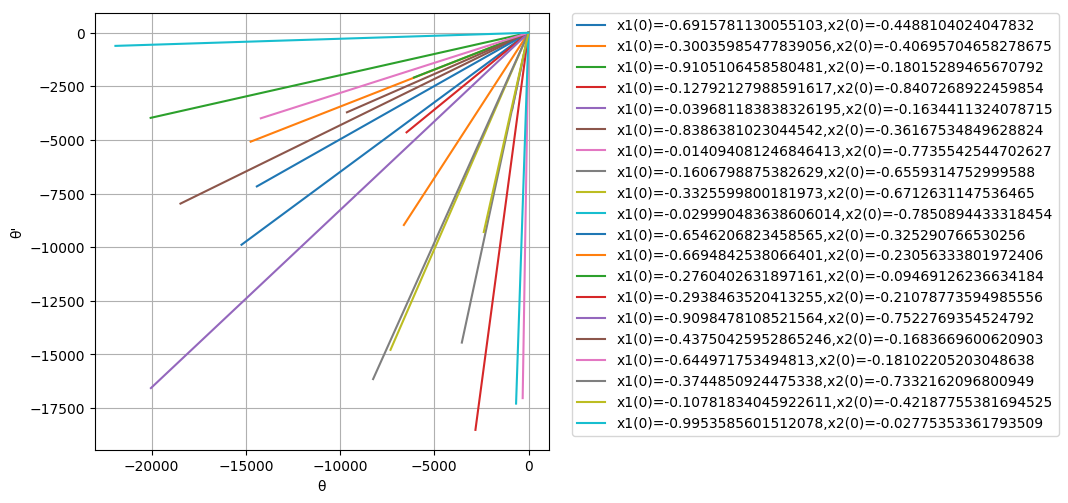

In [82]:
x=rand()-1#se genera una condición inicial x0
# aleatoria
u=rand()-1#se genera una condición inicial u0
# aleatoria
listt=0:0.001:10#definimos otra lista de t 
for i in 1:20# en este for se grafica x y u para 20 condiciones iniciales
x=rand()-1
u=rand()-1
ax=axes()
vec1=RK4vec(f1,listt,[x,u]);   
listx3=map(x->x[1],vec1);
listx4=map(x->x[2],vec1);
grid("on")
xlabel("θ");ylabel("θ'"),
plot(listx3,listx4,label="x1(0)=$x,x2(0)=$u");
legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
ax[:set_position]([0.06,0.06,0.71,0.91])
end
#se observan lineas que salen radialmente

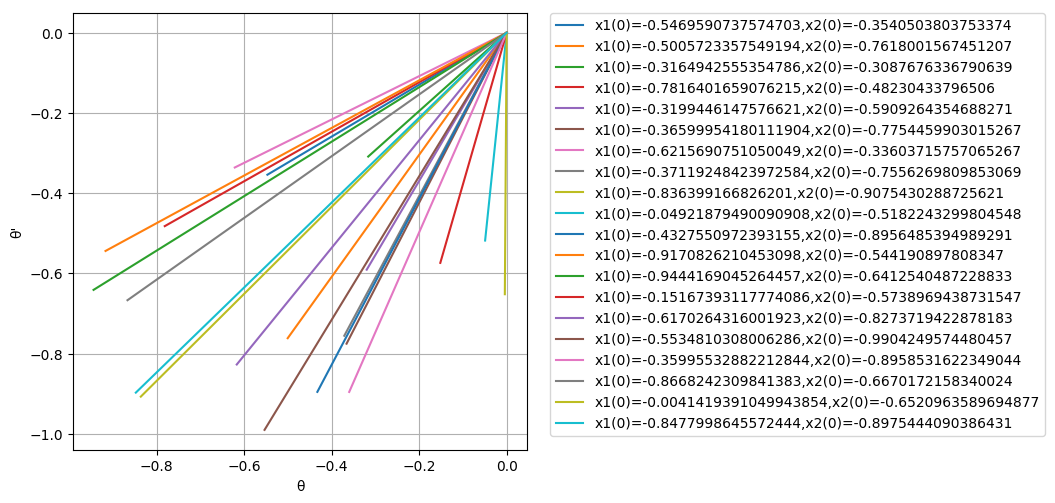

In [83]:
x=rand()-1#se genera una condición inicial x0
# aleatoria
u=rand()-1#se genera una condición inicial u0
# aleatoria
listt=0:0.001:10#definimos otra lista de t 
for i in 1:20# en este for se grafica x y u para 20 condiciones iniciales
x=rand()-1
u=rand()-1
ax=axes()
vec1=RK4vec(f2,listt,[x,u]);   
listx3=map(x->x[1],vec1);
listx4=map(x->x[2],vec1);
grid("on")
xlabel("θ");ylabel("θ'"),
plot(listx3,listx4,label="x1(0)=$x,x2(0)=$u");
legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
ax[:set_position]([0.06,0.06,0.71,0.91])
end
#se observan lineas que salen radialmente

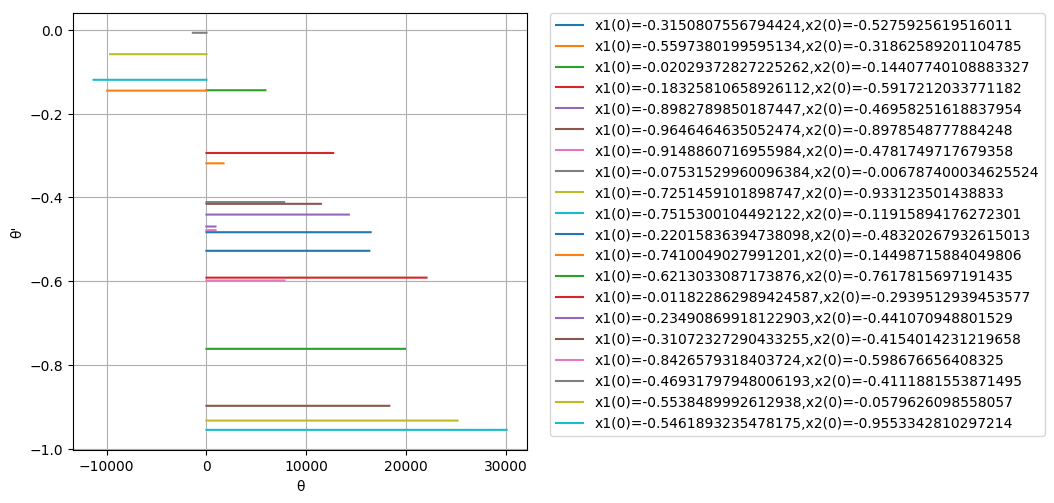

In [95]:
x=rand()-1#se genera una condición inicial x0
# aleatoria
u=rand()-1#se genera una condición inicial u0
# aleatoria
listt=0:0.001:10#definimos otra lista de t 
for i in 1:20# en este for se grafica x y u para 20 condiciones iniciales
x=rand()-1
u=rand()-1
ax=axes()
vec1=RK4vec(f3,listt,[x,u]);   
listx3=map(x->x[1],vec1);
listx4=map(x->x[2],vec1);
grid("on")
xlabel("θ");ylabel("θ'"),
plot(listx3,listx4,label="x1(0)=$x,x2(0)=$u");
legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
ax[:set_position]([0.06,0.06,0.71,0.91])
end
#se observan lineas horizontales

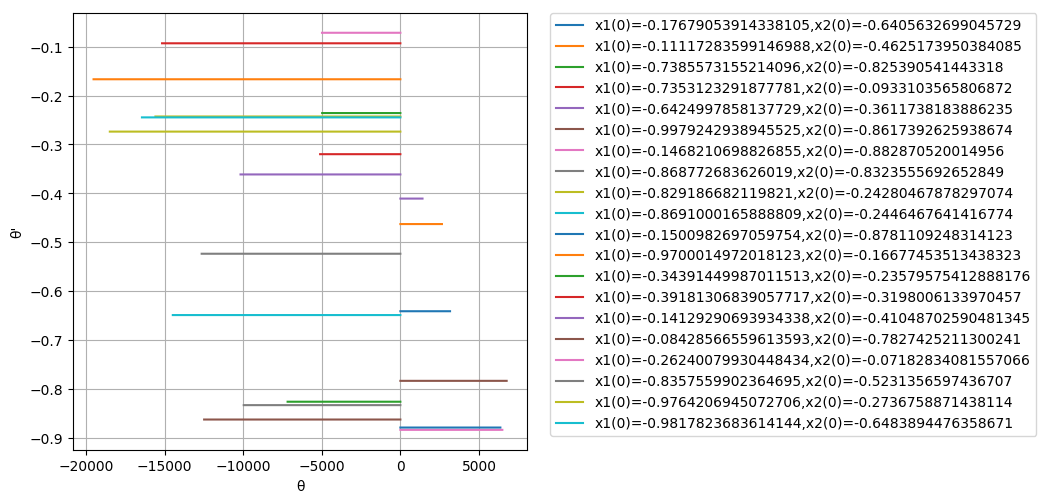

In [85]:
x=rand()-1#se genera una condición inicial x0
# aleatoria
u=rand()-1#se genera una condición inicial u0
# aleatoria
listt=0:0.001:10#definimos otra lista de t 
for i in 1:20# en este for se grafica x y u para 20 condiciones iniciales
x=rand()-1
u=rand()-1
ax=axes()
vec1=RK4vec(f4,listt,[x,u]);   
listx3=map(x->x[1],vec1);
listx4=map(x->x[2],vec1);
grid("on")
xlabel("θ");ylabel("θ'"),
plot(listx3,listx4,label="x1(0)=$x,x2(0)=$u");
legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
ax[:set_position]([0.06,0.06,0.71,0.91])
end
#se observan lineas horizontales

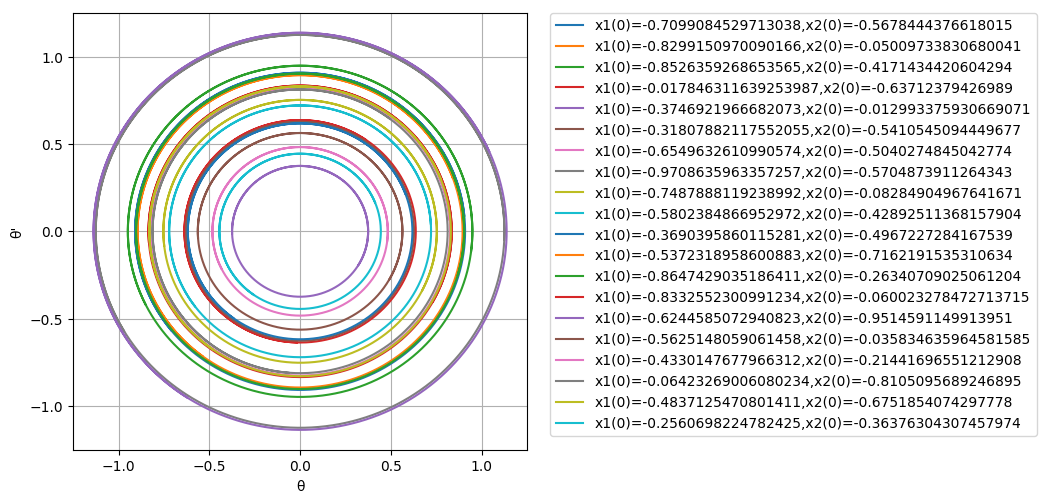

In [86]:
x=rand()-1#se genera una condición inicial x0
# aleatoria
u=rand()-1#se genera una condición inicial u0
# aleatoria
listt=0:0.001:10#definimos otra lista de t 
for i in 1:20# en este for se grafica x y u para 20 condiciones iniciales
x=rand()-1
u=rand()-1
ax=axes()
vec1=RK4vec(f5,listt,[x,u]);   
listx3=map(x->x[1],vec1);
listx4=map(x->x[2],vec1);
grid("on")
xlabel("θ");ylabel("θ'"),
plot(listx3,listx4,label="x1(0)=$x,x2(0)=$u");
legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
ax[:set_position]([0.06,0.06,0.71,0.91])
end
#en este caso en el plano fase hay elipses

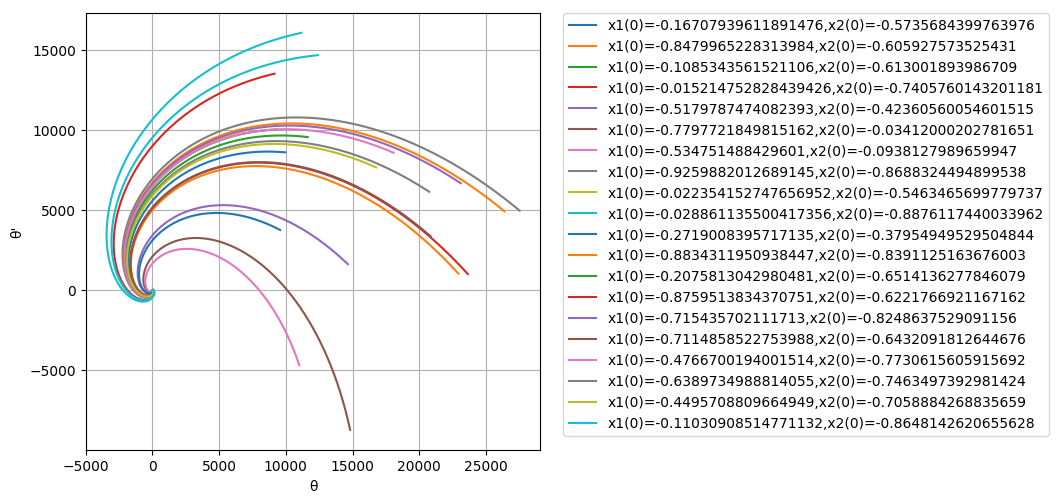

In [87]:
x=rand()-1#se genera una condición inicial x0
# aleatoria
u=rand()-1#se genera una condición inicial u0
# aleatoria
listt=0:0.001:10#definimos otra lista de t 
for i in 1:20# en este for se grafica x y u para 20 condiciones iniciales
x=rand()-1
u=rand()-1
ax=axes()
vec1=RK4vec(f6,listt,[x,u]);   
listx3=map(x->x[1],vec1);
listx4=map(x->x[2],vec1);
grid("on")
xlabel("θ");ylabel("θ'"),
plot(listx3,listx4,label="x1(0)=$x,x2(0)=$u");
legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
ax[:set_position]([0.06,0.06,0.71,0.91])
end
#en el plano fase se observan espirales girando en sentido opuesto a las manecillas del reloj

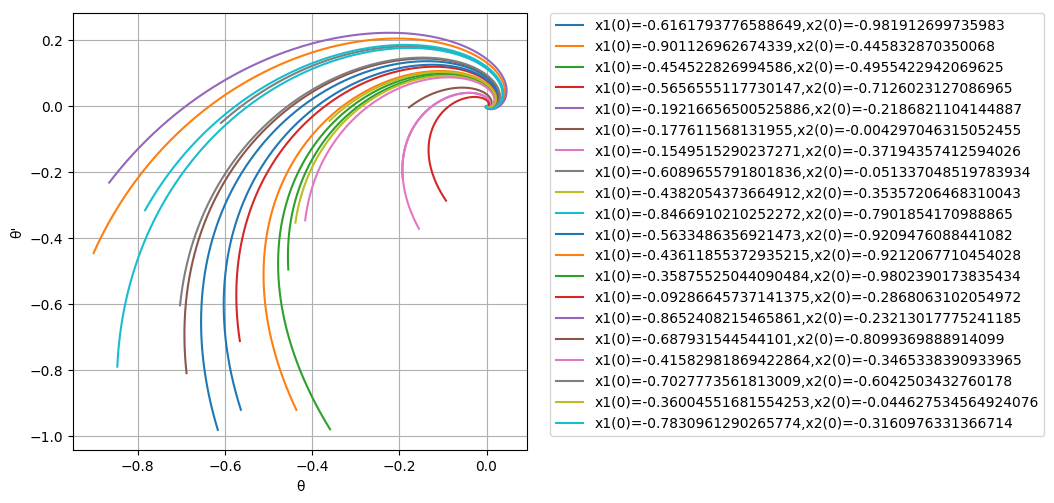

In [88]:
x=rand()-1#se genera una condición inicial x0
# aleatoria
u=rand()-1#se genera una condición inicial u0
# aleatoria
listt=0:0.001:10#definimos otra lista de t 
for i in 1:20# en este for se grafica x y u para 20 condiciones iniciales
x=rand()-1
u=rand()-1
ax=axes()
vec1=RK4vec(f7,listt,[x,u]);   
listx3=map(x->x[1],vec1);
listx4=map(x->x[2],vec1);
grid("on")
xlabel("θ");ylabel("θ'"),
plot(listx3,listx4,label="x1(0)=$x,x2(0)=$u");
legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
ax[:set_position]([0.06,0.06,0.71,0.91])
end
#en el plano fase se observan espirales girando en sentido de las manecillas del reloj

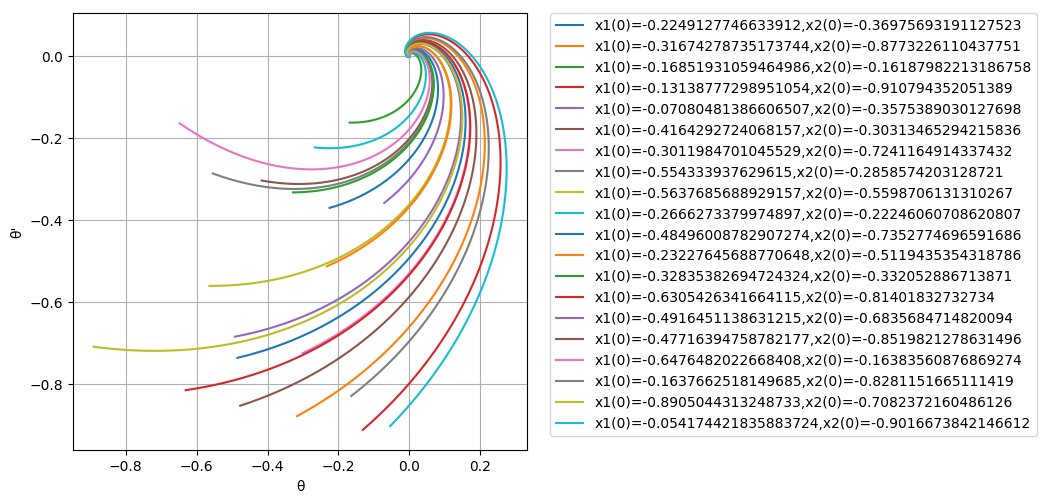

In [89]:
x=rand()-1#se genera una condición inicial x0
# aleatoria
u=rand()-1#se genera una condición inicial u0
# aleatoria
listt=0:0.001:10#definimos otra lista de t 
for i in 1:20# en este for se grafica x y u para 20 condiciones iniciales
x=rand()-1
u=rand()-1
ax=axes()
vec1=RK4vec(f8,listt,[x,u]);   
listx3=map(x->x[1],vec1);
listx4=map(x->x[2],vec1);
grid("on")
xlabel("θ");ylabel("θ'"),
plot(listx3,listx4,label="x1(0)=$x,x2(0)=$u");
legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
ax[:set_position]([0.06,0.06,0.71,0.91])
end
#en el plano fase se observan espirales girando en sentido opuesto a las manecillas del reloj, repulsores

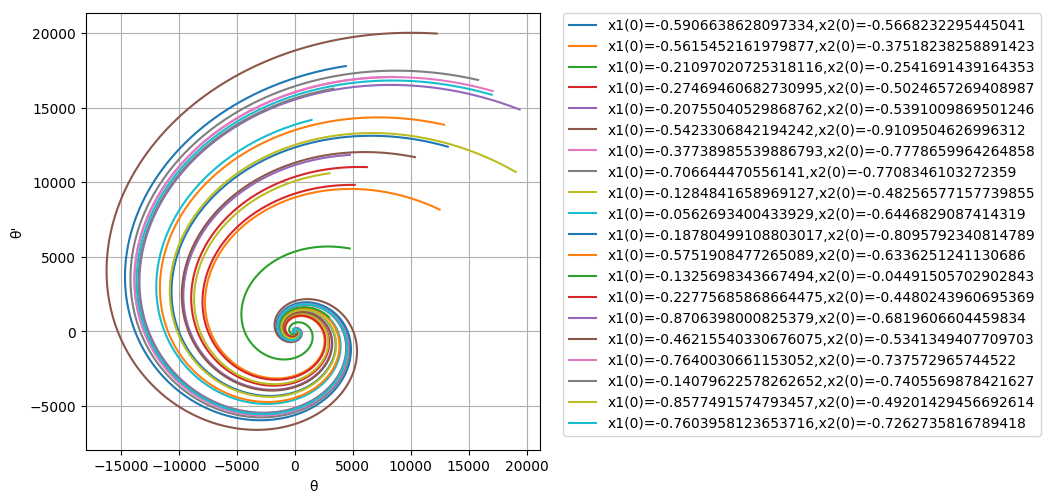

In [90]:
x=rand()-1#se genera una condición inicial x0
# aleatoria
u=rand()-1#se genera una condición inicial u0
# aleatoria
listt=0:0.001:10#definimos otra lista de t 
for i in 1:20# en este for se grafica x y u para 20 condiciones iniciales
x=rand()-1
u=rand()-1
ax=axes()
vec1=RK4vec(f9,listt,[x,u]);   
listx3=map(x->x[1],vec1);
listx4=map(x->x[2],vec1);
grid("on")
xlabel("θ");ylabel("θ'"),
plot(listx3,listx4,label="x1(0)=$x,x2(0)=$u");
legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
ax[:set_position]([0.06,0.06,0.71,0.91])
end
#en el plano fase se observan espirales girando en sentido opuesto a las manecillas del reloj pero con mayor frecuencia

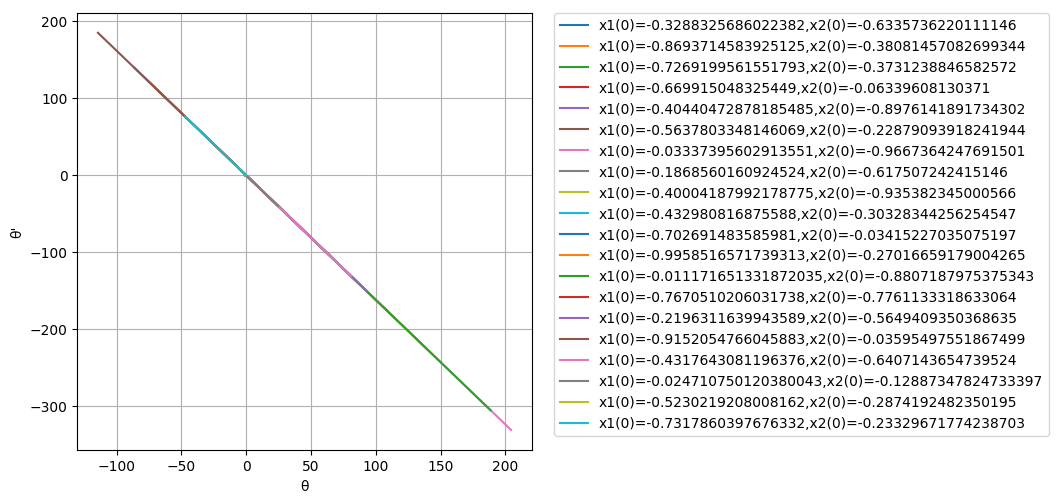

In [93]:
x=rand()-1#se genera una condición inicial x0
# aleatoria
u=rand()-1#se genera una condición inicial u0
# aleatoria
listt=0:0.001:10#definimos otra lista de t 
for i in 1:20# en este for se grafica x y u para 20 condiciones iniciales
x=rand()-1
u=rand()-1
ax=axes()
vec1=RK4vec(f10,listt,[x,u]);   
listx3=map(x->x[1],vec1);
listx4=map(x->x[2],vec1);
grid("on")
xlabel("θ");ylabel("θ'"),
plot(listx3,listx4,label="x1(0)=$x,x2(0)=$u");
legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
ax[:set_position]([0.06,0.06,0.71,0.91])
end
#se observa un sola dirección preferencial del los eigenvalores